# STEP: 1

## Import Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
#part 2 libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
file_path = "Customer_Financial_Info.csv"
df = pd.read_csv(file_path)

# Displaying the first two rows for sanity check
df.head(2)

,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [4]:
# Clean column names by stripping any leading or trailing spaces
df.columns = df.columns.str.strip()

# Check the columns to confirm the changes
print(df.columns)

Index(['Customer_ID', 'Age', 'Years_Experience', 'Annual_Income', 'ZIP_Code',
       'Family_size', 'Avg_Spending', 'Education_Level', 'Mortgage',
       'Has_Consumer_Loan', 'Has_Securities_Account', 'Has_CD_Account',
       'Uses_Online_Banking', 'Has_CreditCard'],
      dtype='object')


# STEP: 2

## Visualization

In [5]:
# Identifying categorical and numerical features
categorical_features = [col for col in df.columns if df[col].nunique() < 10]
numerical_features = [col for col in df.columns if df[col].nunique() >= 10]

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Family_size', 'Education_Level', 'Has_Consumer_Loan', 'Has_Securities_Account', 'Has_CD_Account', 'Uses_Online_Banking', 'Has_CreditCard']
Numerical Features: ['Customer_ID', 'Age', 'Years_Experience', 'Annual_Income', 'ZIP_Code', 'Avg_Spending', 'Mortgage']


### Categorical Features

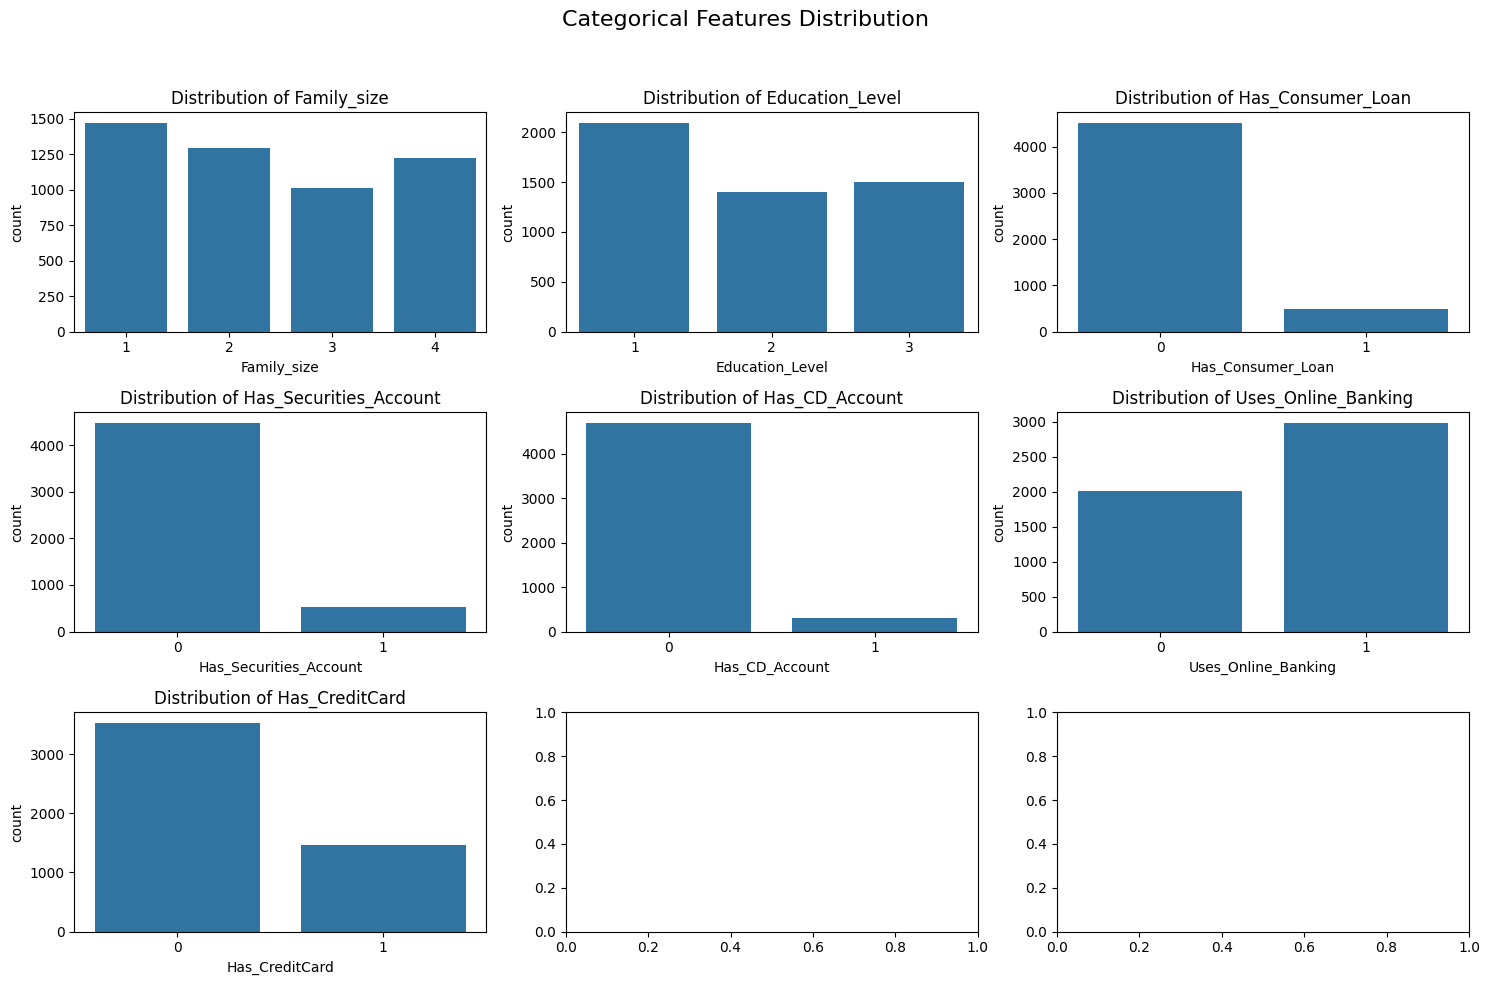

In [6]:
# Number of categorical features
num_categorical = len(categorical_features)

# Calculate the number of rows and columns for the subplots
cols = 3
rows = (num_categorical // cols) + (num_categorical % cols)

# Set up the figure for categorical features
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle('Categorical Features Distribution', fontsize=16)

# Plot each categorical feature in a subplot
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i//cols, i%cols])
    axes[i//cols, i%cols].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Numerical Features

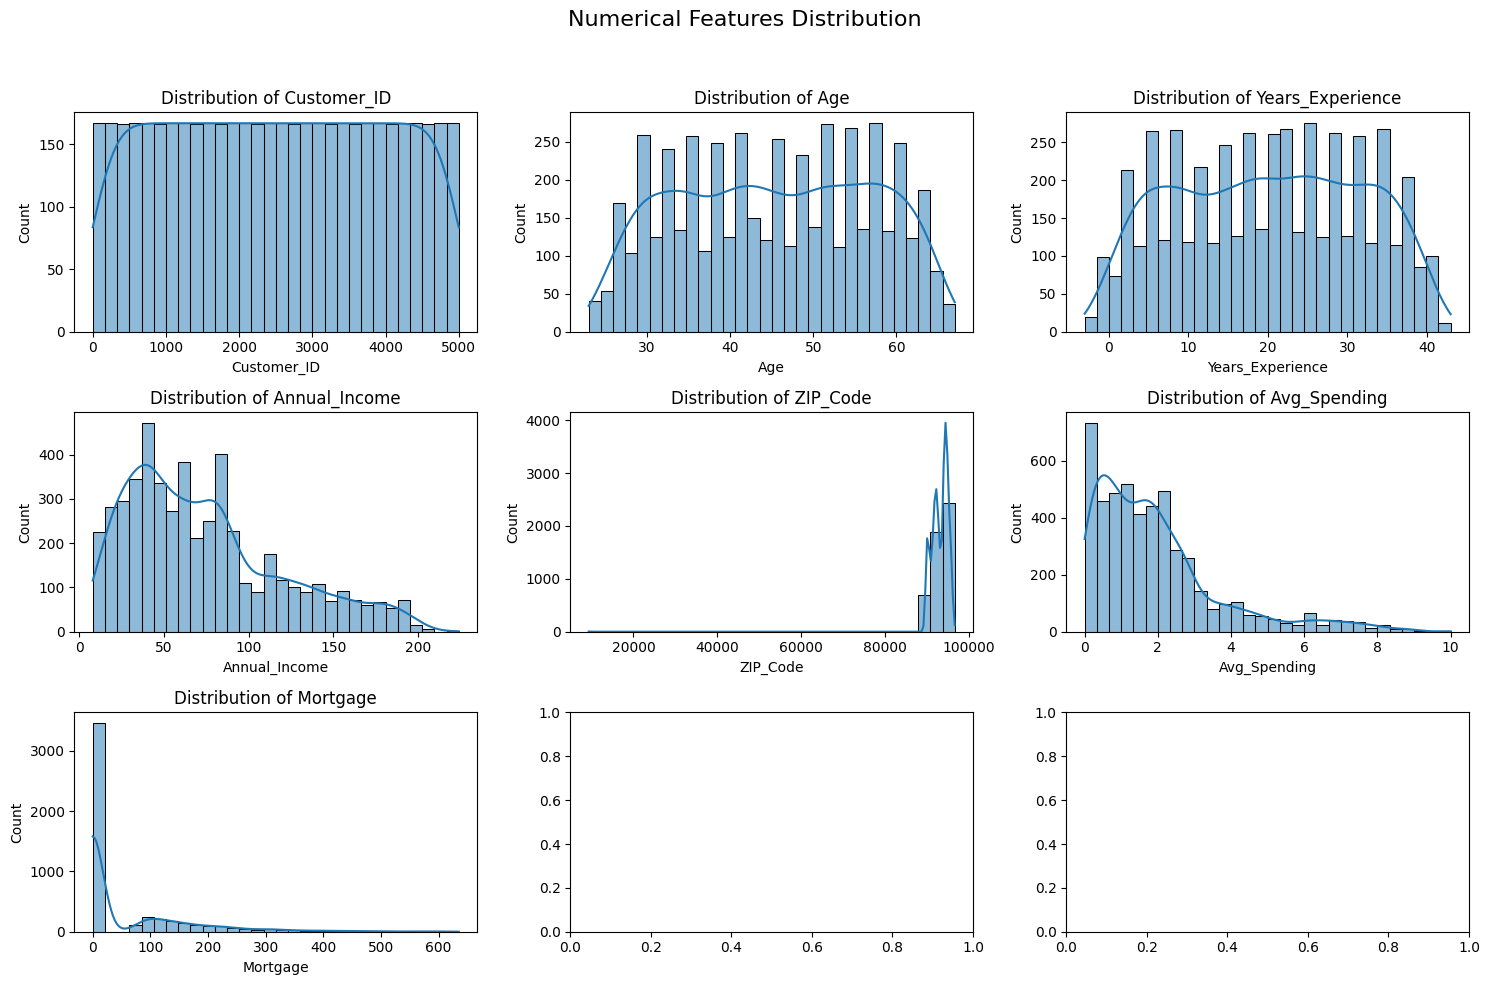

In [7]:
# Number of numerical features
num_numerical = len(numerical_features)

# Calculate the number of rows and columns for the subplots
cols = 3
rows = (num_numerical // cols) + (num_numerical % cols)

# Set up the figure for numerical features
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle('Numerical Features Distribution', fontsize=16)

# Plot each numerical feature in a subplot
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i//cols, i%cols])
    axes[i//cols, i%cols].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [8]:
df

,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


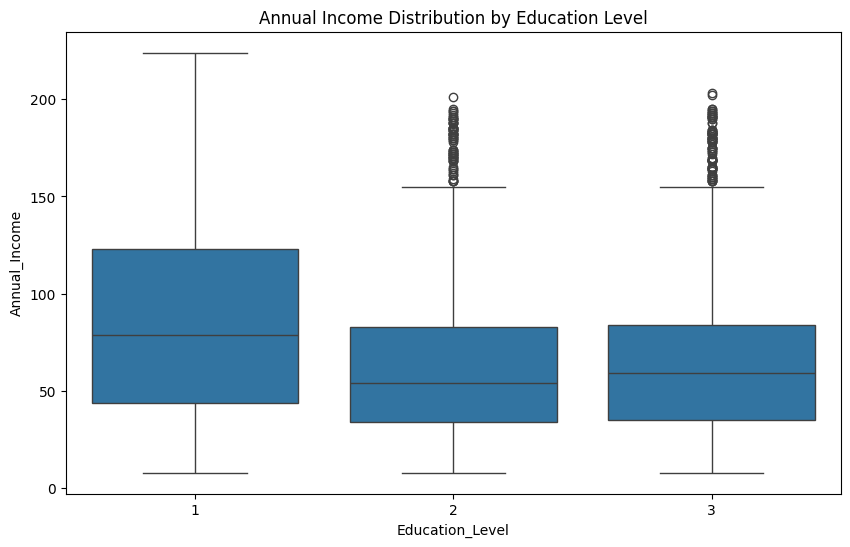

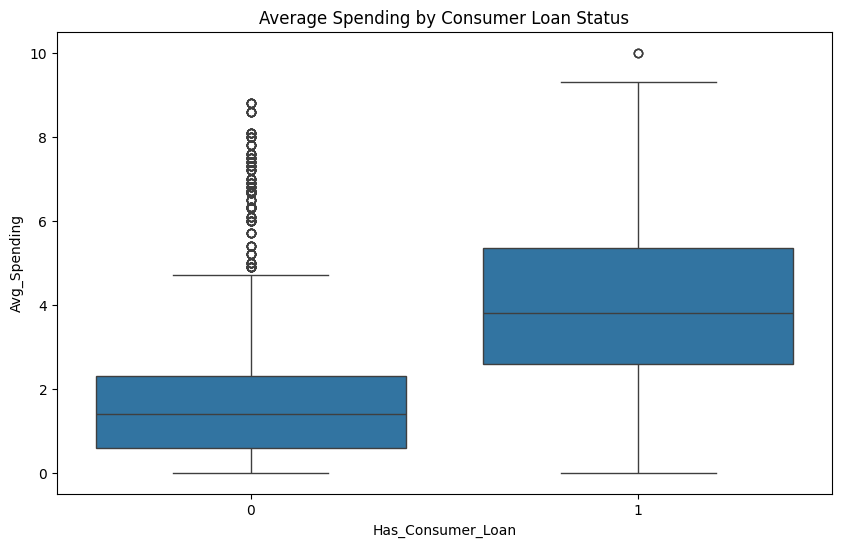

In [9]:
# Plotting a combination of a categorical and numerical feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_Level', y='Annual_Income', data=df)
plt.title('Annual Income Distribution by Education Level')
plt.show()

# Another example: Avg_Spending by Has_Consumer_Loan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has_Consumer_Loan', y='Avg_Spending', data=df)
plt.title('Average Spending by Consumer Loan Status')
plt.show()

```
Consumer Loans and Spending:
Customers with consumer loans tend to spend more on average, likely due to increased access to funds.

Income by Education Level:
Surprisingly, those with undergraduate degrees(value 1) earn more on average than those with higher education, possibly due to non-traditional career paths.

Mortgage Distribution:
Most customers have low or no mortgage, but a small group carries high mortgage debt, indicating potential targets for loan products.

Consumer Loan Prevalence:
While few customers have consumer loans, those who do show distinct spending behaviors, offering a focus for targeted financial products.
```

## Correlation Analysis

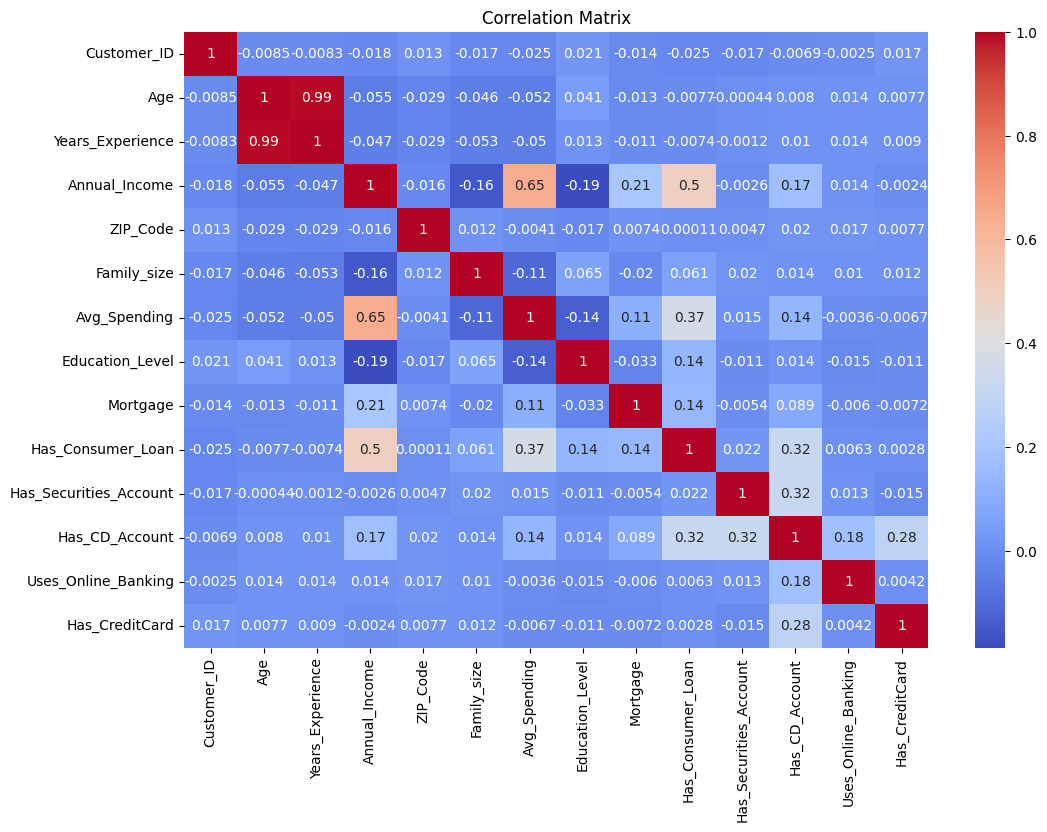

In [10]:
# Correlation matrix visualization
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# This analysis helps in feature selection by identifying highly correlated features
# which can be dropped or combined in feature engineering to avoid multicollinearity.

Analysis:

```
1. Age and Years of Experience: There is a very strong positive correlation (0.99) between Age and Years_Experience. This is expected as, generally, older individuals have more work experience.

2. Annual Income and Average Spending: There is a moderate positive correlation (0.65) between Annual_Income and Avg_Spending, indicating that individuals with higher incomes tend to spend more on average.

3. Has Consumer Loan and Annual Income: There is a moderate positive correlation (0.50) between Has_Consumer_Loan and Annual_Income, suggesting that customers with higher incomes are more likely to have a consumer loan.

4. Has Consumer Loan and Mortgage: There is a moderate positive correlation (0.37) between Has_Consumer_Loan and Mortgage, indicating that customers with a mortgage are also more likely to have a consumer loan.

5. Most other features show very low or negligible correlations with each other, which suggests that they are relatively independent and may contribute uniquely to the predictive model.
```

# STEP: 3

## Data Preprocessing

In [11]:
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Customer_ID               0
Age                       0
Years_Experience          0
Annual_Income             0
ZIP_Code                  0
Family_size               0
Avg_Spending              0
Education_Level           0
Mortgage                  0
Has_Consumer_Loan         0
Has_Securities_Account    0
Has_CD_Account            0
Uses_Online_Banking       0
Has_CreditCard            0
dtype: int64


In [12]:
# number of unique values of each column
[column+" "+str(len(df[column].unique())) for column in df]

['Customer_ID 5000',
 'Age 45',
 'Years_Experience 47',
 'Annual_Income 162',
 'ZIP_Code 467',
 'Family_size 4',
 'Avg_Spending 108',
 'Education_Level 3',
 'Mortgage 347',
 'Has_Consumer_Loan 2',
 'Has_Securities_Account 2',
 'Has_CD_Account 2',
 'Uses_Online_Banking 2',
 'Has_CreditCard 2']

### Feature Engineering

In [13]:
# Debt-to-Income Ratio feature
df['Debt_to_Income_Ratio'] = df['Mortgage'] / df['Annual_Income']

# Spending-to-Income Ratio feature
df['Spending_to_Income_Ratio'] = df['Avg_Spending'] / df['Annual_Income']

# Education and Income Interaction feature
# This feature will multiply Education Level by Income to capture interaction effects
df['Education_Income_Interaction'] = df['Education_Level'] * df['Annual_Income']

# Creating a Loan Propensity Score feature
# This is a composite score combining Avg_Spending, Mortgage, and Annual_Income
df['Loan_Propensity_Score'] = (
                               df['Avg_Spending'] / df['Annual_Income'] * 0.5 +
                               df['Mortgage'] / df['Annual_Income'] * 0.3 +
                               df['Annual_Income'] * 0.2
                               )

# Display the first few rows to check the new features
df.head()

,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard,Debt_to_Income_Ratio,Spending_to_Income_Ratio,Education_Income_Interaction,Loan_Propensity_Score
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0.0,0.032653,49,9.816327
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.0,0.044118,34,6.822059
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.0,0.090909,11,2.245455
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.0,0.027000,200,20.013500
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.0,0.022222,90,9.011111


### Handling Outliers , Adjusting Scale, Skewness

In [16]:
# Calculating Z-scores
z_scores = np.abs(zscore(df[numerical_features]))

# Filtering out rows where any Z-score is greater than 3 (i.e., outliers)
df_cleaned = df[(z_scores < 3).all(axis=1)]

# Checking how many rows were removed
rows_before = df.shape[0]
rows_after = df_cleaned.shape[0]
rows_removed = rows_before - rows_after

print(f"Rows before cleaning: {rows_before}")
print(f"Rows after cleaning: {rows_after}")
print(f"Rows removed: {rows_removed}")

Rows before cleaning: 5000
Rows after cleaning: 4785
Rows removed: 215


In [19]:
# Checking skewness in the numerical features
skewed_features = df_cleaned[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewed Features:\n", skewed_features)

# Applying log transformation to reduce skewness if skewness is high (> 0.5 or < -0.5)
for feature in skewed_features.index:
    if skewed_features[feature] > 0.5 or skewed_features[feature] < -0.5:
        df_cleaned[feature] = np.log1p(df_cleaned[feature])

# Rechecking skewness after transformation
skewed_features_transformed = df_cleaned[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewed Features after Transformation:\n", skewed_features_transformed)

Skewed Features:
 Mortgage            0.933086
Avg_Spending        0.188603
Customer_ID        -0.003169
Years_Experience   -0.026886
Age                -0.032119
ZIP_Code           -0.296956
Annual_Income      -0.428405
dtype: float64
Skewed Features after Transformation:
 Mortgage            0.908063
Avg_Spending        0.188603
Customer_ID        -0.003169
Years_Experience   -0.026886
Age                -0.032119
ZIP_Code           -0.296956
Annual_Income      -0.428405
dtype: float64


In [20]:
# Standardization (mean=0, std=1) for numerical features
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Displaying the first few rows of the cleaned and transformed dataset
df_cleaned.head()

,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard,Debt_to_Income_Ratio,Spending_to_Income_Ratio,Education_Income_Interaction,Loan_Propensity_Score
0,-1.736867,-1.772764,-1.664336,-0.230121,-1.173461,4,0.129953,1,-0.645454,0,1,0,0,0,0.0,0.032653,49,9.816327
1,-1.736174,-0.033442,-0.099593,-0.768478,-1.752306,3,0.051075,1,-0.645454,0,1,0,0,0,0.0,0.044118,34,6.822059
2,-1.735482,-0.555238,-0.447314,-2.384175,0.880927,1,-0.397692,1,-0.645454,0,0,0,0,0,0.0,0.090909,11,2.245455
3,-1.734789,-0.903103,-0.968895,0.831116,0.535212,1,0.839518,2,-0.645454,0,0,0,0,0,0.0,0.027000,200,20.013500
4,-1.734096,-0.903103,-1.055825,-0.355975,-1.046661,4,-0.397692,2,-0.645454,0,0,0,0,1,0.0,0.022222,90,9.011111


*italicized text*# STEP: 5

## Splitting the data into train and test

In [21]:
# Splitting the dataset into train and test sets (80% train, 20% test)
X = df.drop('Has_Consumer_Loan', axis=1)
y = df['Has_Consumer_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (4000, 17)
Test set size: (1000, 17)


In [22]:
display(y_train.value_counts(normalize=True))
display(y_test.value_counts(normalize=True))

Has_Consumer_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

Has_Consumer_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

## Logistic Regression model

In [23]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting and evaluating
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.82      0.64      0.72        96

    accuracy                           0.95      1000
   macro avg       0.89      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000



```
version 1: without feature engineering
Logistic Regression Accuracy: 0.912
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       904
           1       0.58      0.30      0.40        96

    accuracy                           0.91      1000
   macro avg       0.75      0.64      0.67      1000
weighted avg       0.90      0.91      0.90      1000

version 2: after feature engineering
Logistic Regression Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.82      0.64      0.72        96

    accuracy                           0.95      1000
   macro avg       0.89      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000
```

## Finding the best split

In [24]:

training_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_score = 0
best_split = 0

for split in training_splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split, random_state=42, stratify=y)
    
    log_reg = LogisticRegression()
    
    # Perform cross-validation
    cross_val_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1')
    mean_cv_score = cross_val_scores.mean()
    
    # Train on the full training set
    log_reg.fit(X_train, y_train)
    y_pred_log_reg = log_reg.predict(X_test)
    
    # Evaluate on the test set
    test_f1_score = f1_score(y_test, y_pred_log_reg)
    
    print(f"Training Split: {split}")
    print("Mean CV F1 Score:", mean_cv_score)
    print("Test F1 Score:", test_f1_score)
    
    # Choose the best split based on the cross-validation score
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_split = split

print(f"Best Cross-Validation F1 Score: {best_score} at Training Split: {best_split}")

Training Split: 0.1
Mean CV F1 Score: 0.6622222222222222
Test F1 Score: 0.6909090909090909
Training Split: 0.2
Mean CV F1 Score: 0.6501247771836007
Test F1 Score: 0.7039274924471299
Training Split: 0.3
Mean CV F1 Score: 0.6567700258397934
Test F1 Score: 0.708904109589041
Training Split: 0.4
Mean CV F1 Score: 0.6828889048943128
Test F1 Score: 0.6946107784431138
Training Split: 0.5
Mean CV F1 Score: 0.6523927478593267
Test F1 Score: 0.7298578199052133
Training Split: 0.6
Mean CV F1 Score: 0.6646424578955562
Test F1 Score: 0.7246376811594203
Training Split: 0.7
Mean CV F1 Score: 0.6835760272356489
Test F1 Score: 0.6987951807228916
Training Split: 0.8
Mean CV F1 Score: 0.7056345161778147
Test F1 Score: 0.7176470588235294
Training Split: 0.9
Mean CV F1 Score: 0.6873044177891611
Test F1 Score: 0.7764705882352941
Best Cross-Validation F1 Score: 0.7056345161778147 at Training Split: 0.8


## Decision Tree model

In [25]:
# Decision Tree model
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# Predicting and evaluating
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.992
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       452
           1       0.92      1.00      0.96        48

    accuracy                           0.99       500
   macro avg       0.96      1.00      0.98       500
weighted avg       0.99      0.99      0.99       500



```
version 1: without feature engineering
Decision Tree Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.88      0.94      0.91        96

    accuracy                           0.98      1000
   macro avg       0.94      0.96      0.95      1000
weighted avg       0.98      0.98      0.98      1000

version 2: after feature engineering
Decision Tree Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.91      0.94      0.92        96

    accuracy                           0.98      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.99      0.98      0.99      1000
```

## Finding the best split

In [26]:


training_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_score = 0
best_split = 0

for split in training_splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split, random_state=42, stratify=y)
    
    tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    
    # Perform cross-validation
    cross_val_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1')
    mean_cv_score = cross_val_scores.mean()
    
    # Train on the full training set
    tree_clf.fit(X_train, y_train)
    y_pred_tree_clf = tree_clf.predict(X_test)
    
    # Evaluate on the test set
    test_f1_score = f1_score(y_test, y_pred_tree_clf)
    
    print(f"Training Split: {split}")
    print("Mean CV F1 Score:", mean_cv_score)
    print("Test F1 Score:", test_f1_score)
    
    # Choose the best split based on the cross-validation score
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_split = split

print(f"Best Cross-Validation F1 Score: {best_score} at Training Split: {best_split}")


Training Split: 0.1
Mean CV F1 Score: 0.7963226694186447
Test F1 Score: 0.7699530516431925
Training Split: 0.2
Mean CV F1 Score: 0.7524319803615307
Test F1 Score: 0.8718626155878467
Training Split: 0.3
Mean CV F1 Score: 0.8533983866770752
Test F1 Score: 0.898021308980213
Training Split: 0.4
Mean CV F1 Score: 0.876119065978221
Test F1 Score: 0.8972972972972973
Training Split: 0.5
Mean CV F1 Score: 0.8841842452807862
Test F1 Score: 0.8989247311827957
Training Split: 0.6
Mean CV F1 Score: 0.8716499025033437
Test F1 Score: 0.912
Training Split: 0.7
Mean CV F1 Score: 0.871626850597772
Test F1 Score: 0.8737201365187713
Training Split: 0.8
Mean CV F1 Score: 0.8868893219001327
Test F1 Score: 0.9230769230769231
Training Split: 0.9
Mean CV F1 Score: 0.8900690041431714
Test F1 Score: 0.96
Best Cross-Validation F1 Score: 0.8900690041431714 at Training Split: 0.9


## Hyperparameter Tuning

In [28]:
##Defining method for Hyperparameter tuning


def tuneHyperparam(model,X_train, X_test, y_train, y_test,param_grid,scoring):
    # Initialize GridSearchCV with the model instance and parameter grid
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
       
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Output the best parameters and the best score
    print(f"Best parameters for {scoring}:", grid_search.best_params_)
    print(f"Best cross-validation score for {scoring}:", grid_search.best_score_)

def tuneHyperparamForMultipleMatrics(model,X_train, X_test, y_train, y_test,param_grid):
    scoring_metrics = ['accuracy','precision','recall','f1']
    for metric in scoring_metrics :
            tuneHyperparam(model,X_train, X_test, y_train, y_test,param_grid,metric)    

### Logistic Regression Hyperparameter Tuning
### Justification:


**Key Hyperparameter**: C (Regularization Strength)

**Regularization Importance**: In Logistic Regression, the hyperparameter C controls the strength of regularization. Regularization is used to prevent the model from overfitting by penalizing large coefficients in the model. In the context of your campaign, overfitting can lead to a model that performs well on training data but poorly on unseen data, resulting in inefficient targeting.
Balancing Bias and Variance: A lower value of C indicates stronger regularization (higher penalty on coefficients), which can help in reducing variance and avoiding overfitting. Conversely, a higher value of C allows the model to fit the training data more closely, potentially increasing variance but reducing bias.
Model Generalization: By tuning C, you aim to find a balance that maximizes the model’s ability to generalize to new data, which is crucial for predicting customer behavior accurately. Proper tuning ensures that the model performs well not just on training data but also on new, unseen customer data, enhancing the effectiveness of your campaigns.
Implementation:

**GridSearchCV**: Using GridSearchCV with a range of C values (e.g., 0.01, 0.1, 1, 10, 100) helps find the optimal value that balances regularization and model performance. This method evaluates different values of C through cross-validation, providing a robust estimate of the best parameter.


In [29]:
##For Logistic Regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Adjust this according to your needs
}

# Create an instance of the LogisticRegression model
log_reg = LogisticRegression()
# Call tuneHyperparamForMultipleMatrics method
tuneHyperparamForMultipleMatrics(log_reg,X_train, X_test, y_train, y_test,param_grid)

Best parameters for accuracy: {'C': 1}
Best cross-validation score for accuracy: 0.9495555555555557
Best parameters for precision: {'C': 1}
Best cross-validation score for precision: 0.8480239289025742
Best parameters for recall: {'C': 0.01}
Best cross-validation score for recall: 0.5856188184977278
Best parameters for f1: {'C': 0.1}
Best cross-validation score for f1: 0.6882989127494996


### Decision Tree Hyperparameter Tuning

### Justification:

**Key Hyperparameters**: max_depth, min_samples_split, min_samples_leaf

**Tree Complexity**:

**max_depth**: Controls the maximum depth of the tree. A deeper tree can model more complex relationships but might overfit the training data. In your campaign, a deeper tree might capture more intricate patterns but could also lead to overfitting if the tree becomes too complex. Tuning max_depth helps in finding a balance that captures the essential patterns without overfitting.
min_samples_split: Defines the minimum number of samples required to split an internal node. Increasing this value can prevent the tree from creating nodes that are too specific to the training data, thus reducing overfitting and making the model more robust. In your case, this helps in focusing on splits that generalize well, rather than those that fit noise in the training data.

**min_samples_leaf**: Specifies the minimum number of samples required to be at a leaf node. A higher value prevents the model from learning overly specific details, which can improve generalization. This ensures that each leaf node contains a sufficient number of samples, making the model's predictions more reliable and stable.
Model Interpretability and Performance: Tuning these hyperparameters helps in controlling the complexity of the Decision Tree, which is crucial for creating a model that is not only accurate but also interpretable. For a marketing campaign, having a model that can explain why certain customers are predicted to convert can provide valuable insights for tailoring the campaign strategies.
Implementation:
**GridSearchCV**: By using GridSearchCV with a range of values for max_depth, min_samples_split, and min_samples_leaf, you can systematically explore different configurations and find the optimal combination. This method evaluates the performance of various parameter settings through cross-validation, ensuring the selected hyperparameters contribute to a well-performing and generalizable model.

In [30]:
## For Decesion Tree
# Define the parameter grid for GridSearchCV without 'classifier__'
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create an instance of DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Call tuneHyperparamForMultipleMatrics method
tuneHyperparamForMultipleMatrics(tree_clf,X_train, X_test, y_train, y_test,param_grid)



Best parameters for accuracy: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for accuracy: 0.9813333333333333
Best parameters for precision: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score for precision: 0.9460427264368553
Best parameters for recall: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score for recall: 0.8911520983694199
Best parameters for f1: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for f1: 0.9011733944442621


# STEP: 6

## Performance Evaluation

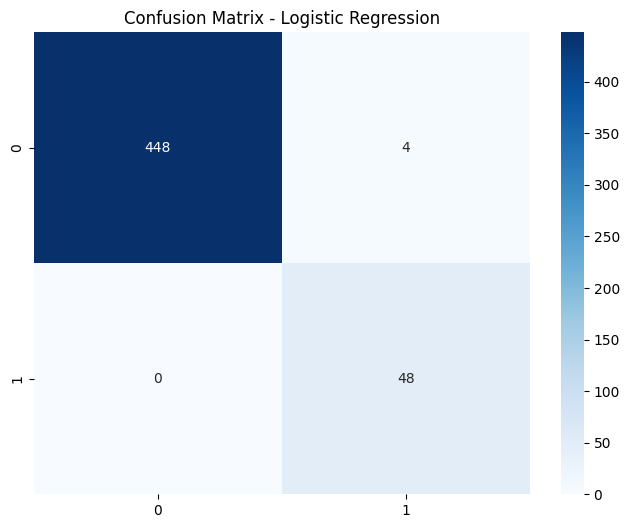

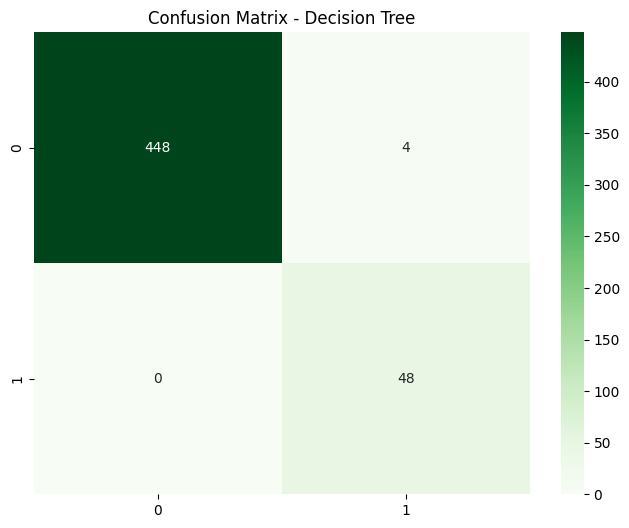

In [31]:
# Confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

```
Insights:
-> Feature Engineering Impact on Logistic Regression:
Feature engineering significantly improved the Logistic Regression model's ability to correctly classify customers with consumer loans.
The new features enhanced the model's precision, recall, and overall classification performance, making it better at identifying relevant patterns.

-> Decision Tree Performance:
The Decision Tree model performed exceptionally well both before and after feature engineering.
Feature engineering provided only a slight improvement, indicating the model's inherent strength in capturing complex relationships in the data.

-> Comparison Between Models:
The Decision Tree model consistently outperforms Logistic Regression, particularly in identifying customers with consumer loans.
Logistic Regression benefits more from feature engineering, while the Decision Tree is already highly effective even without additional features.

-> Conclusion:
The Decision Tree is the preferred model due to its consistently strong performance.
Feature engineering benefits both models, but the impact is more significant on simpler models like Logistic Regression. While Decision Trees also see improvements from feature engineering, the effect is less pronounced because the model is already adept at capturing complex relationships in the given data.
```

## Part 2

### ML models using K-Nearest Neighbors (K-NN)

In [32]:

# Initialize the K-Nearest Neighbors model
k = 5  # Example value
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model with the training data
knn.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model's performance
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.922
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       452
           1       0.91      0.21      0.34        48

    accuracy                           0.92       500
   macro avg       0.92      0.60      0.65       500
weighted avg       0.92      0.92      0.90       500



### Hyperparameter tuning using KNN

In [33]:

# Define the parameter grid for K-NN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create an instance of KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Call tuneHyperparamForMultipleMatrics method
tuneHyperparamForMultipleMatrics(knn_clf,X_train, X_test, y_train, y_test,param_grid_knn)


Best parameters for accuracy: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score for accuracy: 0.9233333333333335
Best parameters for precision: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
Best cross-validation score for precision: 1.0
Best parameters for recall: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for recall: 0.280112269446672
Best parameters for f1: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for f1: 0.40990458773742294


ML models using Naive Bayes model


In [34]:


# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Train the model with the training data
naive_bayes.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Evaluate the model's performance
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_naive_bayes))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_naive_bayes))


Naive Bayes Accuracy: 0.922
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       452
           1       0.57      0.81      0.67        48

    accuracy                           0.92       500
   macro avg       0.77      0.87      0.81       500
weighted avg       0.94      0.92      0.93       500



### Tune Hyperparameter for Naive Bayes

In [35]:
param_grid_naive_bayes = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

tuneHyperparamForMultipleMatrics(naive_bayes,X_train, X_test, y_train, y_test,param_grid_naive_bayes)

Best parameters for accuracy: {'var_smoothing': np.float64(0.0012328467394420659)}
Best cross-validation score for accuracy: 0.944
Best parameters for precision: {'var_smoothing': np.float64(0.005336699231206307)}
Best cross-validation score for precision: 0.9925925925925926
Best parameters for recall: {'var_smoothing': np.float64(1.519911082952933e-09)}
Best cross-validation score for recall: 0.8378508420208501
Best parameters for f1: {'var_smoothing': np.float64(0.0001873817422860383)}
Best cross-validation score for f1: 0.6635503450038333


Random Forest

In [36]:

# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees in the forest

# Train the model with the training data
random_forest.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the model's performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))


Random Forest Accuracy: 0.996
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       0.98      0.98      0.98        48

    accuracy                           1.00       500
   macro avg       0.99      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500



### Hyper parameter tuning for random forest

In [37]:
param_grid_random_forest = {
    # commenting other hyper paramters as it takes long time to tune them
    # 'n_estimators': [10, 20, 30],  # Number of trees in the forest
    # 'max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split
    # 'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

tuneHyperparamForMultipleMatrics(random_forest,X_train, X_test, y_train, y_test,param_grid_random_forest)

Best parameters for accuracy: {'bootstrap': False}
Best cross-validation score for accuracy: 0.9842222222222222
Best parameters for precision: {'bootstrap': True}
Best cross-validation score for precision: 0.9577755661588704
Best parameters for recall: {'bootstrap': False}
Best cross-validation score for recall: 0.8865276663993585
Best parameters for f1: {'bootstrap': False}
Best cross-validation score for f1: 0.9149606583116352


Ada Boost

In [38]:


# Initialize the AdaBoost model
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Train the model with the training data
adaboost.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_adaboost = adaboost.predict(X_test)

# Evaluate the model's performance
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_adaboost))


AdaBoost Accuracy: 0.978
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       452
           1       0.91      0.85      0.88        48

    accuracy                           0.98       500
   macro avg       0.95      0.92      0.93       500
weighted avg       0.98      0.98      0.98       500



Tune hyperparameter for ada boost

In [39]:
param_grid_ada_boost = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0]  # Weight applied to each weak learner
}

tuneHyperparamForMultipleMatrics(adaboost,X_train, X_test, y_train, y_test,param_grid_ada_boost)

Best parameters for accuracy: {'learning_rate': 1.0, 'n_estimators': 200}
Best cross-validation score for accuracy: 0.9775555555555556
Best parameters for precision: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation score for precision: 0.9680662768031189
Best parameters for recall: {'learning_rate': 1.0, 'n_estimators': 200}
Best cross-validation score for recall: 0.8334402566158781
Best parameters for f1: {'learning_rate': 1.0, 'n_estimators': 200}
Best cross-validation score for f1: 0.8768407330726171


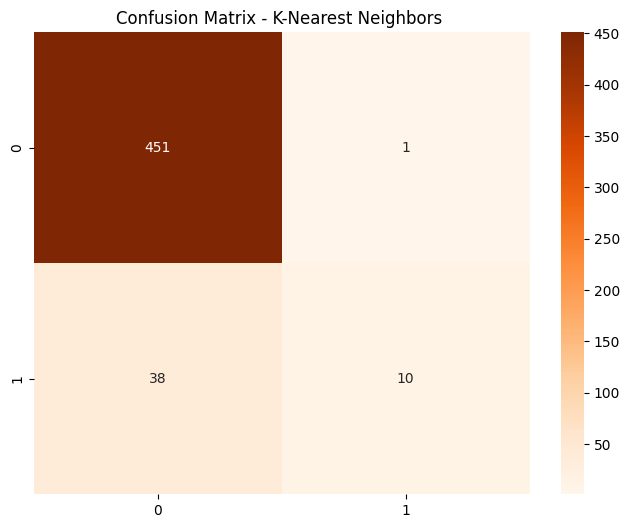

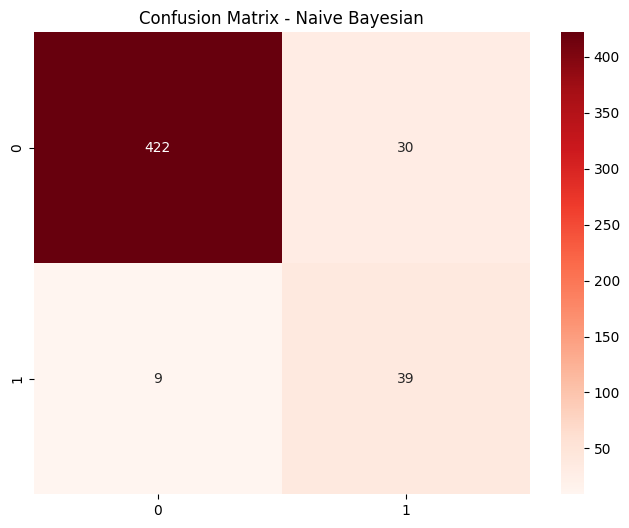

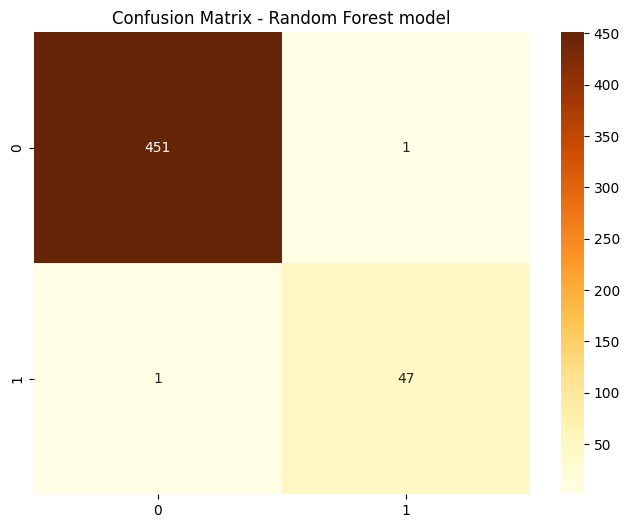

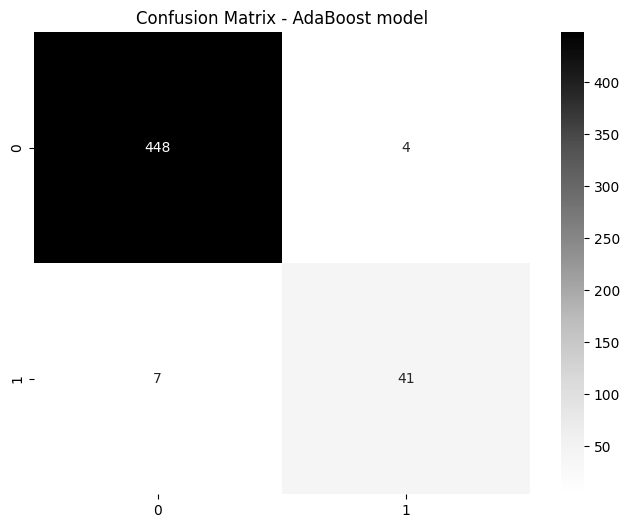

In [40]:
# Confusion matrix for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - K-Nearest Neighbors ')
plt.show()

# Confusion matrix for Naive Bayesian
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_naive_bayes), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Naive Bayesian')
plt.show()

# Confusion matrix for Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, fmt='d', cmap='YlOrBr')
plt.title('Confusion Matrix - Random Forest model')
plt.show()

# Confusion matrix for AdaBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix - AdaBoost model')
plt.show()

Random Forest: Outperforms the other models with the highest accuracy and excellent performance metrics across both classes. It effectively handles class imbalance and provides a balanced performance.

AdaBoost: Also performs very well with high accuracy and strong metrics for both classes. It is slightly less effective on the minority class compared to Random Forest but still handles class imbalance quite well.

Naive Bayes: Provides good performance on the majority class but shows moderate performance on the minority class. It is an improvement over K-NN but not as effective as Random Forest or AdaBoost.

K-Nearest Neighbors (K-NN): Shows excellent performance on the majority class but very poor performance on the minority class, indicating significant issues with class imbalance.

Recommendations:
For Best Overall Performance: Use Random Forest if the goal is to achieve the highest accuracy and balanced performance across both classes.
